In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

from api_keys import weather_api_key

!pip install citipy 
from citipy import citipy

In [2]:
weather_api_key

'06a0fdf8c84449412c6c64ded970d760'

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#base URL
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "q=" +city + "&appid=" +weather_api_key +"&units=" +units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bongaree
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | fannuj
City not found. Skipping...
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | lembar
City not found. Skipping...
Processing Record 13 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | jeddah
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | tarawa
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Se

Processing Record 37 of Set 4 | bac kan
Processing Record 38 of Set 4 | takamaka
City not found. Skipping...
Processing Record 39 of Set 4 | san antonio de pale
Processing Record 40 of Set 4 | lms
City not found. Skipping...
Processing Record 41 of Set 4 | weno
Processing Record 42 of Set 4 | paragominas
Processing Record 43 of Set 4 | oundle
Processing Record 44 of Set 4 | youghal
Processing Record 45 of Set 4 | tataouine
Processing Record 46 of Set 4 | pariaman
Processing Record 47 of Set 4 | jacmel
Processing Record 48 of Set 4 | minas de marcona
Processing Record 49 of Set 4 | tocopilla
Processing Record 0 of Set 5 | mogadishu
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | kose
Processing Record 3 of Set 5 | nova sintra
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | petropavlovsk-kamchatsky
Processing Record 6 of Set 5 | collie
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | santa ana
Processing Record 9 

Processing Record 28 of Set 8 | bafoulabe
Processing Record 29 of Set 8 | raurkela
City not found. Skipping...
Processing Record 30 of Set 8 | cuajinicuilapa
Processing Record 31 of Set 8 | brokopondo
Processing Record 32 of Set 8 | vohipaho
City not found. Skipping...
Processing Record 33 of Set 8 | tabuk
Processing Record 34 of Set 8 | ceeldheer
Processing Record 35 of Set 8 | waingapu
Processing Record 36 of Set 8 | roma
Processing Record 37 of Set 8 | toliara
Processing Record 38 of Set 8 | cabo san lucas
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | saint croix
Processing Record 41 of Set 8 | garoowe
Processing Record 42 of Set 8 | margherita
Processing Record 43 of Set 8 | ha'il
Processing Record 44 of Set 8 | dinghaicun
Processing Record 45 of Set 8 | ijuw
City not found. Skipping...
Processing Record 46 of Set 8 | kavieng
Processing Record 47 of Set 8 | tralee
Processing Record 48 of Set 8 | myeik
Processing Record 49 of Set 8 | nabire
Processing 

Processing Record 16 of Set 12 | lagoa
Processing Record 17 of Set 12 | mersing
Processing Record 18 of Set 12 | brisas de zicatela
Processing Record 19 of Set 12 | manismata
Processing Record 20 of Set 12 | buka
Processing Record 21 of Set 12 | la ronge
Processing Record 22 of Set 12 | benguela
Processing Record 23 of Set 12 | poronaysk
Processing Record 24 of Set 12 | yangambi
Processing Record 25 of Set 12 | tvoroyri
Processing Record 26 of Set 12 | antofagasta
Processing Record 27 of Set 12 | ambodifotatra
Processing Record 28 of Set 12 | as sulayyil
Processing Record 29 of Set 12 | mandalgovi
Processing Record 30 of Set 12 | long beach
Processing Record 31 of Set 12 | island harbour
Processing Record 32 of Set 12 | valencia de alcantara
Processing Record 33 of Set 12 | aral
Processing Record 34 of Set 12 | anabar
City not found. Skipping...
Processing Record 35 of Set 12 | simoes filho
Processing Record 36 of Set 12 | sao paulo de olivenca
Processing Record 37 of Set 12 | ceparana

In [5]:
city_data

[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 3.7,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 20.87,
  'Country': 'TF',
  'Date': 1696363388},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 9.34,
  'Humidity': 79,
  'Cloudiness': 98,
  'Wind Speed': 2.68,
  'Country': 'NZ',
  'Date': 1696363388},
 {'City': 'bongaree',
  'Lat': -27.0797,
  'Lng': 153.1586,
  'Max Temp': 21.79,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 1.85,
  'Country': 'AU',
  'Date': 1696363209},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 13.25,
  'Humidity': 47,
  'Cloudiness': 40,
  'Wind Speed': 12.35,
  'Country': 'CL',
  'Date': 1696363389},
 {'City': 'klyuchi',
  'Lat': 52.2667,
  'Lng': 79.1667,
  'Max Temp': 6.28,
  'Humidity': 51,
  'Cloudiness': 1,
  'Wind Speed': 2.64,
  'Country': 'RU',
  'Date': 1696363389},
 {'City': 'iqaluit',
  'Lat': 63.7506,
  'Lng': -68.5145,
  'Max Temp': 1.85

In [6]:
city_data_df = pd.DataFrame(city_data)

In [7]:
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [52]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Datetime
0,port-aux-francais,-49.3500,70.2167,3.70,94,100,20.87,TF,2023-10-03 20:03:08,2023-10-03 20:03:08
1,waitangi,-43.9535,-176.5597,9.34,79,98,2.68,NZ,2023-10-03 20:03:08,2023-10-03 20:03:08
2,bongaree,-27.0797,153.1586,21.79,92,100,1.85,AU,2023-10-03 20:00:09,2023-10-03 20:00:09
3,puerto natales,-51.7236,-72.4875,13.25,47,40,12.35,CL,2023-10-03 20:03:09,2023-10-03 20:03:09
4,klyuchi,52.2667,79.1667,6.28,51,1,2.64,RU,2023-10-03 20:03:09,2023-10-03 20:03:09


In [51]:
def unix_timestamp_to_datetime(timestamp):
    time_struct = time.gmtime(timestamp)
    formatted_time = time.strftime('%Y-%m-%d %H:%M:%S', time_struct)
    return formatted_time

city_data_df['Date'] = city_data_df['Date'].apply(unix_timestamp_to_datetime)
city_data_df = city_data_df.drop('Datetime', axis=1)
print(city_data_df)

    

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    port-aux-francais -49.3500   70.2167      3.70        94         100   
1             waitangi -43.9535 -176.5597      9.34        79          98   
2             bongaree -27.0797  153.1586     21.79        92         100   
3       puerto natales -51.7236  -72.4875     13.25        47          40   
4              klyuchi  52.2667   79.1667      6.28        51           1   
..                 ...      ...       ...       ...       ...         ...   
564             acarau  -2.8856  -40.1200     27.70        68          77   
565      pervomayskoye  43.9190   46.7102     16.71        75          95   
566         strezhevoy  60.7333   77.5889      9.98        87          97   
567             tupiza -21.4500  -65.7167     28.20         4          13   
568         ust'-kulom  61.6864   53.6902      6.87        96         100   

     Wind Speed Country                 Date             Datetime  
0      

In [53]:
city_data_df = city_data_df.drop('Datetime', axis=1)
print(city_data_df)

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    port-aux-francais -49.3500   70.2167      3.70        94         100   
1             waitangi -43.9535 -176.5597      9.34        79          98   
2             bongaree -27.0797  153.1586     21.79        92         100   
3       puerto natales -51.7236  -72.4875     13.25        47          40   
4              klyuchi  52.2667   79.1667      6.28        51           1   
..                 ...      ...       ...       ...       ...         ...   
564             acarau  -2.8856  -40.1200     27.70        68          77   
565      pervomayskoye  43.9190   46.7102     16.71        75          95   
566         strezhevoy  60.7333   77.5889      9.98        87          97   
567             tupiza -21.4500  -65.7167     28.20         4          13   
568         ust'-kulom  61.6864   53.6902      6.87        96         100   

     Wind Speed Country                 Date  
0         20.87      TF  202

In [54]:
file_path = 'output_data/cities.csv'

In [55]:
city_data_df.to_csv(file_path, index_label ="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.70,94,100,20.87,TF,2023-10-03 20:03:08
1,waitangi,-43.9535,-176.5597,9.34,79,98,2.68,NZ,2023-10-03 20:03:08
2,bongaree,-27.0797,153.1586,21.79,92,100,1.85,AU,2023-10-03 20:00:09
3,puerto natales,-51.7236,-72.4875,13.25,47,40,12.35,CL,2023-10-03 20:03:09
4,klyuchi,52.2667,79.1667,6.28,51,1,2.64,RU,2023-10-03 20:03:09


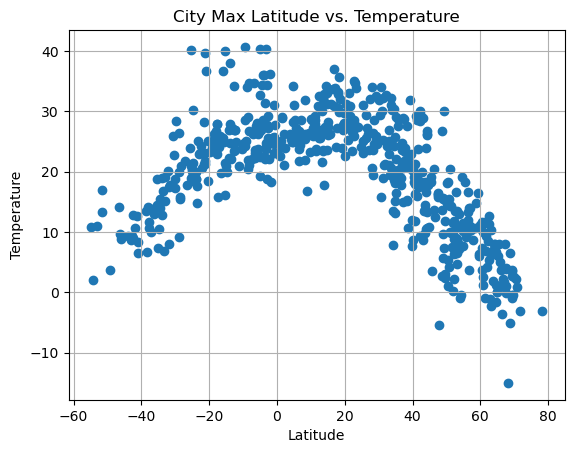

In [81]:
#need to build scatter plot
#latitude vs temp
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('City Max Latitude vs. Temperature')
plt.savefig("output_data/Fig1.png")

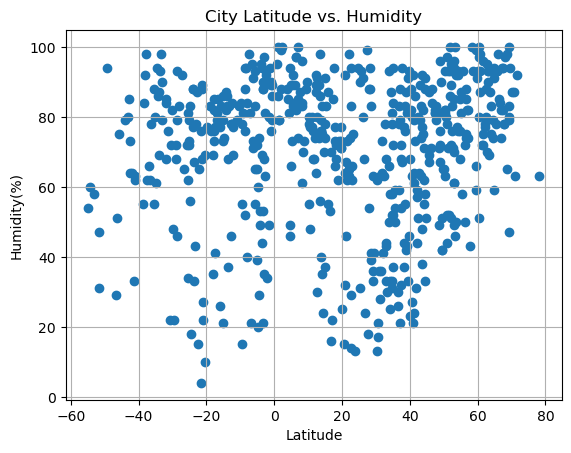

In [82]:
#latitude vs humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
plt.title('City Latitude vs. Humidity')
plt.savefig("output_data/Fig2.png")

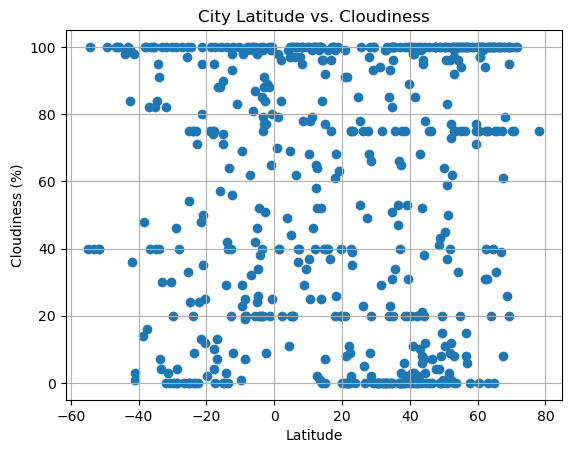

In [83]:
#latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)
plt.savefig("output_data/Fig3.png")

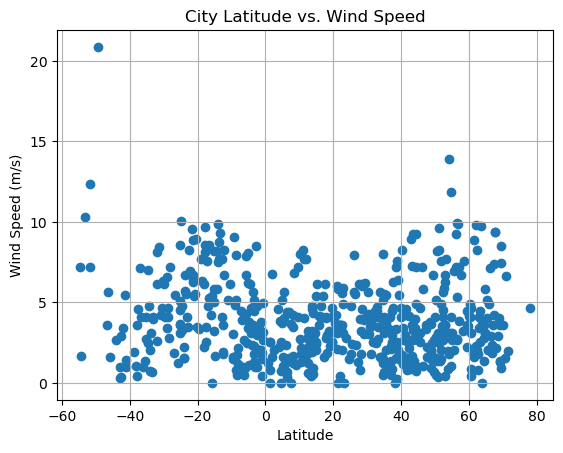

In [84]:
#latitude vs wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.savefig("output_data/Fig4.png")

In [60]:
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)

    # Create the regression line
    regress_values = slope * x + intercept
    plt.plot(x, regress_values, "r-")
    line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Adding labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()

# Call the function to create the linear regression plot
#create_linear_regression_plot(x, y, 'X-axis', 'Y-axis', 'Linear Regression Plot')


In [61]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

In [62]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,klyuchi,52.2667,79.1667,6.28,51,1,2.64,RU,2023-10-03 20:03:09
5,iqaluit,63.7506,-68.5145,1.85,87,100,9.77,CA,2023-10-03 20:03:09
8,thompson,55.7435,-97.8558,9.09,93,100,2.06,CA,2023-10-03 20:01:44
9,longyearbyen,78.2186,15.6401,-3.09,63,75,4.63,SJ,2023-10-03 20:03:10
10,albany,42.6001,-73.9662,29.26,64,2,0.89,US,2023-10-03 20:00:02
...,...,...,...,...,...,...,...,...,...
562,qom,34.6401,50.8764,24.19,33,82,5.12,IR,2023-10-03 20:04:20
563,bauchi,10.5000,10.0000,25.88,48,25,1.82,NG,2023-10-03 20:04:20
565,pervomayskoye,43.9190,46.7102,16.71,75,95,1.34,RU,2023-10-03 20:04:21
566,strezhevoy,60.7333,77.5889,9.98,87,97,0.45,RU,2023-10-03 20:04:21


In [63]:
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.70,94,100,20.87,TF,2023-10-03 20:03:08
1,waitangi,-43.9535,-176.5597,9.34,79,98,2.68,NZ,2023-10-03 20:03:08
2,bongaree,-27.0797,153.1586,21.79,92,100,1.85,AU,2023-10-03 20:00:09
3,puerto natales,-51.7236,-72.4875,13.25,47,40,12.35,CL,2023-10-03 20:03:09
6,grytviken,-54.2811,-36.5092,2.07,60,100,1.70,GS,2023-10-03 20:03:09
...,...,...,...,...,...,...,...,...,...
556,humberto de campos,-2.5983,-43.4611,29.26,63,84,4.76,BR,2023-10-03 20:04:16
559,kimbe,-5.5502,150.1429,23.68,93,42,2.45,PG,2023-10-03 20:04:19
560,jayapura,-2.5333,140.7000,25.66,92,77,2.09,ID,2023-10-03 20:04:19
564,acarau,-2.8856,-40.1200,27.70,68,77,8.49,BR,2023-10-03 20:04:20


In [64]:
slope, intercept, r_value1, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

In [65]:
slope,intercept

(-0.4313456263619861, 34.54829329283373)

In [66]:
r_value1

-0.8151015708031677

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


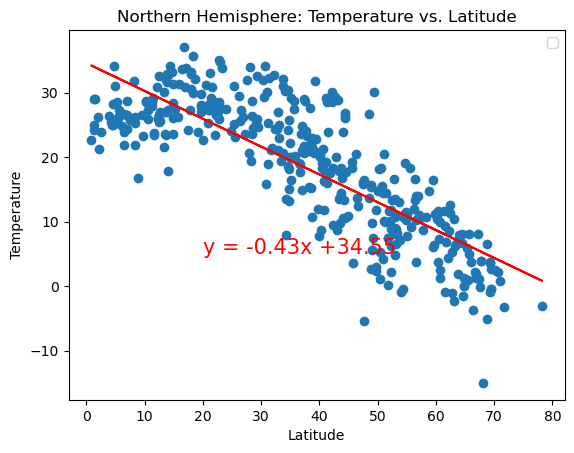

The r-value is: -0.8151015708031677


In [67]:
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature', 'Northern Hemisphere: Temperature vs. Latitude')
print(f"The r-value is: {r_value1}")


In [68]:
slope, intercept, r_value2, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope,intercept

(0.41067433902722905, 30.33070479901968)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


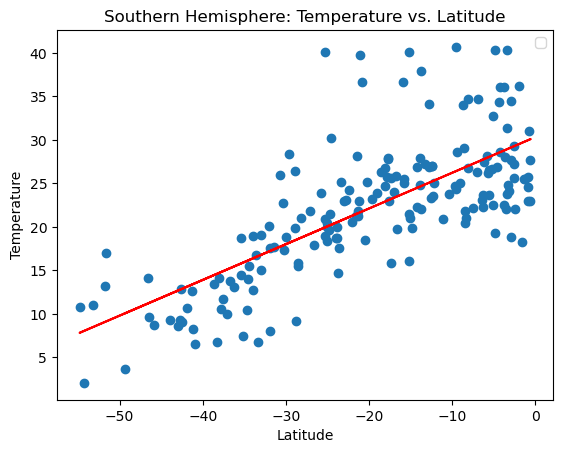

The r-value is: 0.7234624296544757


In [69]:
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature', 'Southern Hemisphere: Temperature vs. Latitude')
print(f"The r-value is: {r_value2}")

Discussion about linear relationship: Both relationships have high r values.
In the Northern Hemisphere, as the latitude increases and we get further
away from the equator, temperatures drop, as represented by the negative r value.
In the Southern Hemisphere, as we get closer to the equator, temperatures rise.

In [70]:
slope, intercept, r_value3, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope,intercept

(0.13800498967226227, 65.56907233796997)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


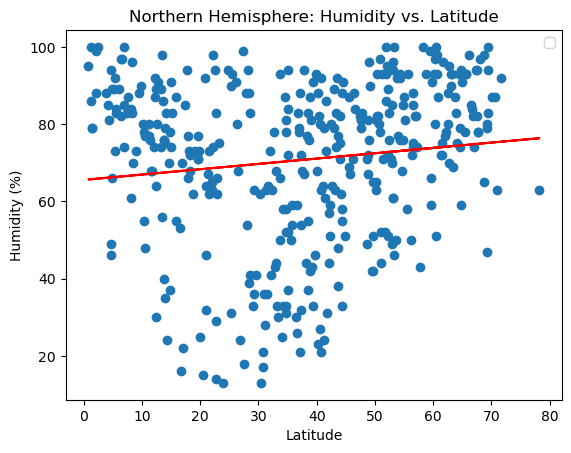

The r-value is: 0.12596826256307173


In [71]:
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern Hemisphere: Humidity vs. Latitude')
print(f"The r-value is: {r_value3}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


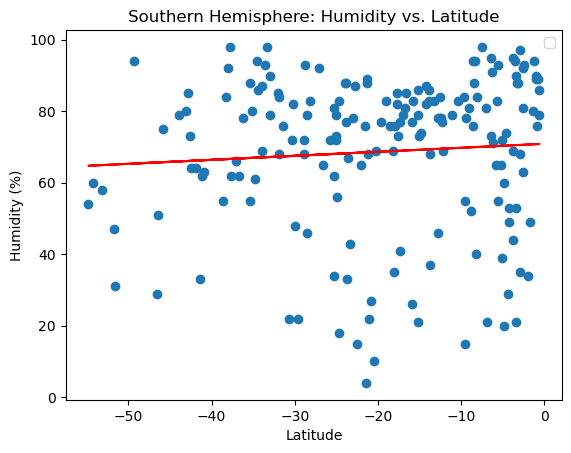

The r-value is: 0.07131520645584276


In [72]:
slope, intercept, r_value4, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern Hemisphere: Humidity vs. Latitude')
print(f"The r-value is: {r_value4}")

Discussion about the linear relationship: Both hemispheres have no relationship between the latitude and the % of humidity, humidity levels vary at each latitude

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


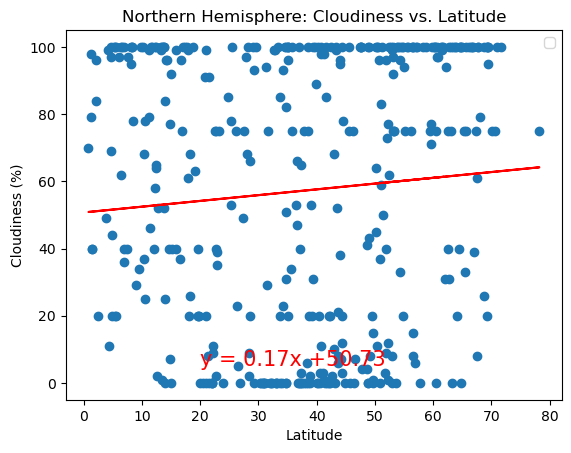

The r-value is: 0.08251563228008678


In [73]:
slope, intercept, r_value5, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere: Cloudiness vs. Latitude')
print(f"The r-value is: {r_value5}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


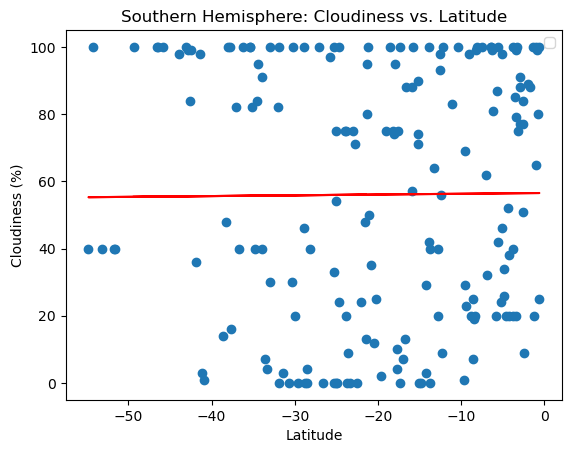

The r-value is: 0.008529202642756663


In [74]:
slope, intercept, r_value6, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere: Cloudiness vs. Latitude')
print(f"The r-value is: {r_value6}")

Again, there is minimal relation between the latitude and the % of cloudiness in both hemispheres

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


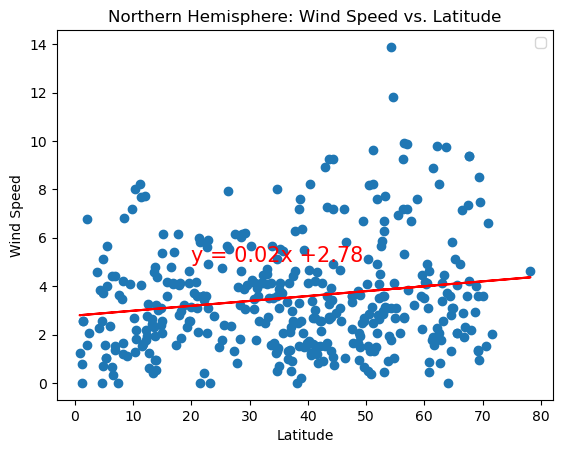

The r-value is: 0.1710941363373232


In [79]:
slope, intercept, r_value7, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern Hemisphere: Wind Speed vs. Latitude')
print(f"The r-value is: {r_value7}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


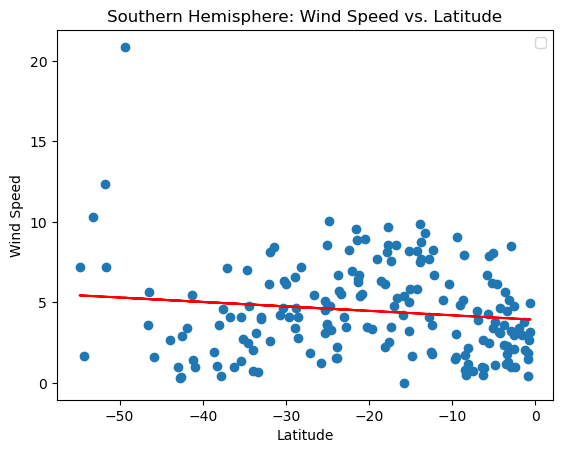

The r-value is: -0.13190458961093288


In [85]:
slope, intercept, r_value7, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern Hemisphere: Wind Speed vs. Latitude')
print(f"The r-value is: {r_value7}")

wind speed is also very loosely related to the latitude, and with the exception of 
outliers in the southern hemisphere, is pretty slow.
In the northern hemisphere there is more variety, but still a weak relationship between latitude and wind speed.